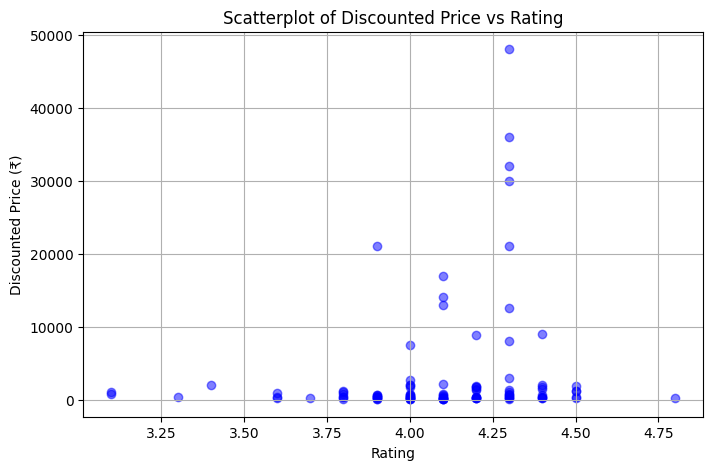

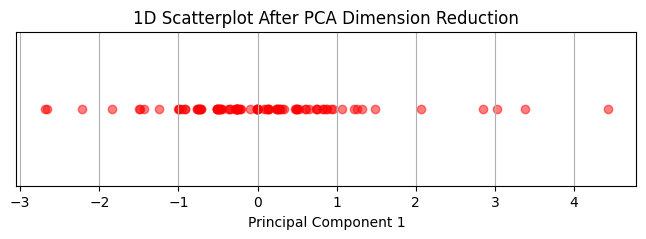

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
df = pd.read_csv("amazon.csv")

# Cleaning and converting numerical columns
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing values in selected columns
df_cleaned = df.dropna(subset=['rating', 'discounted_price'])

# Sample 100 rows from the cleaned dataset
df_sampled = df_cleaned.sample(n=100, random_state=42)

# Scatterplot with dot markers
plt.figure(figsize=(8, 5))
plt.scatter(df_sampled['rating'], df_sampled['discounted_price'], alpha=0.5, color='blue', marker='o')  # 'o' for dots
plt.xlabel('Rating')
plt.ylabel('Discounted Price (₹)')
plt.title('Scatterplot of Discounted Price vs Rating')
plt.grid(True)
plt.show()

# Select features for PCA
X = df_sampled[['rating', 'discounted_price']].dropna()

# Standardize the data (important for PCA)
X_standardized = (X - X.mean()) / X.std()

# Apply PCA to reduce dimensions to 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_standardized)

# Scatterplot in 1D
plt.figure(figsize=(8, 2))
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.5, color='red', marker='o')  # 1D representation
plt.xlabel('Principal Component 1')
plt.title('1D Scatterplot After PCA Dimension Reduction')
plt.yticks([])  # Hide y-axis
plt.grid(True, axis='x')
plt.show()